# Convolutional Neural Network (CNN)

# Data Pipeline

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2025-05-25 15:32:08.312478: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Normalize images
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Data augmentation
def augment_img(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, label

In [4]:
# Create tf.data pipelines
batch_size = 64

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(10000).map(normalize_img).map(augment_img).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.map(normalize_img).batch(batch_size).prefetch(tf.data.AUTOTUNE)

2025-05-25 15:32:26.249590: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 153600000 exceeds 10% of free system memory.
2025-05-25 15:32:26.877914: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30720000 exceeds 10% of free system memory.


# Visualizing the Dataset

2025-05-25 15:32:26.970092: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 153600000 exceeds 10% of free system memory.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07891857..0.86617947].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.22524601..1.0095598].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.09844626..1.0866816].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02454947..0.9283917].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.032748915..0.7672511].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got rang

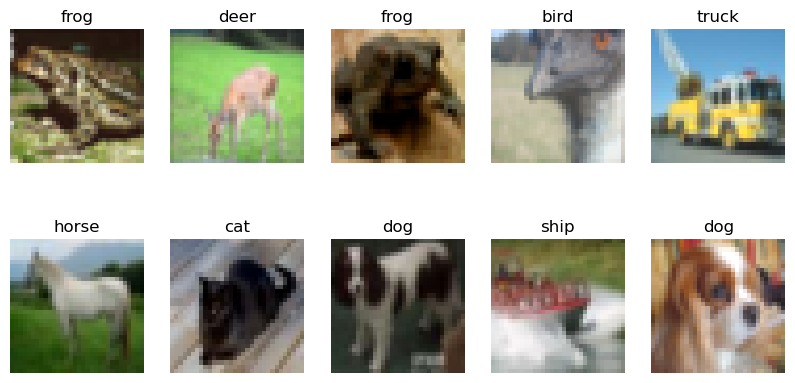

In [5]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,5))
for images, labels in train_ds.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
plt.show()

# CNN NN Architecture 

In [20]:
from tensorflow import keras
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model

In [21]:
inputs = Input(shape=(32,32,3))
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
X = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(10, activation='softmax')(x)

In [22]:
model = Model(inputs, outputs)

In [23]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,218 (1.37 MB)

 Trainable params: 357,514 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

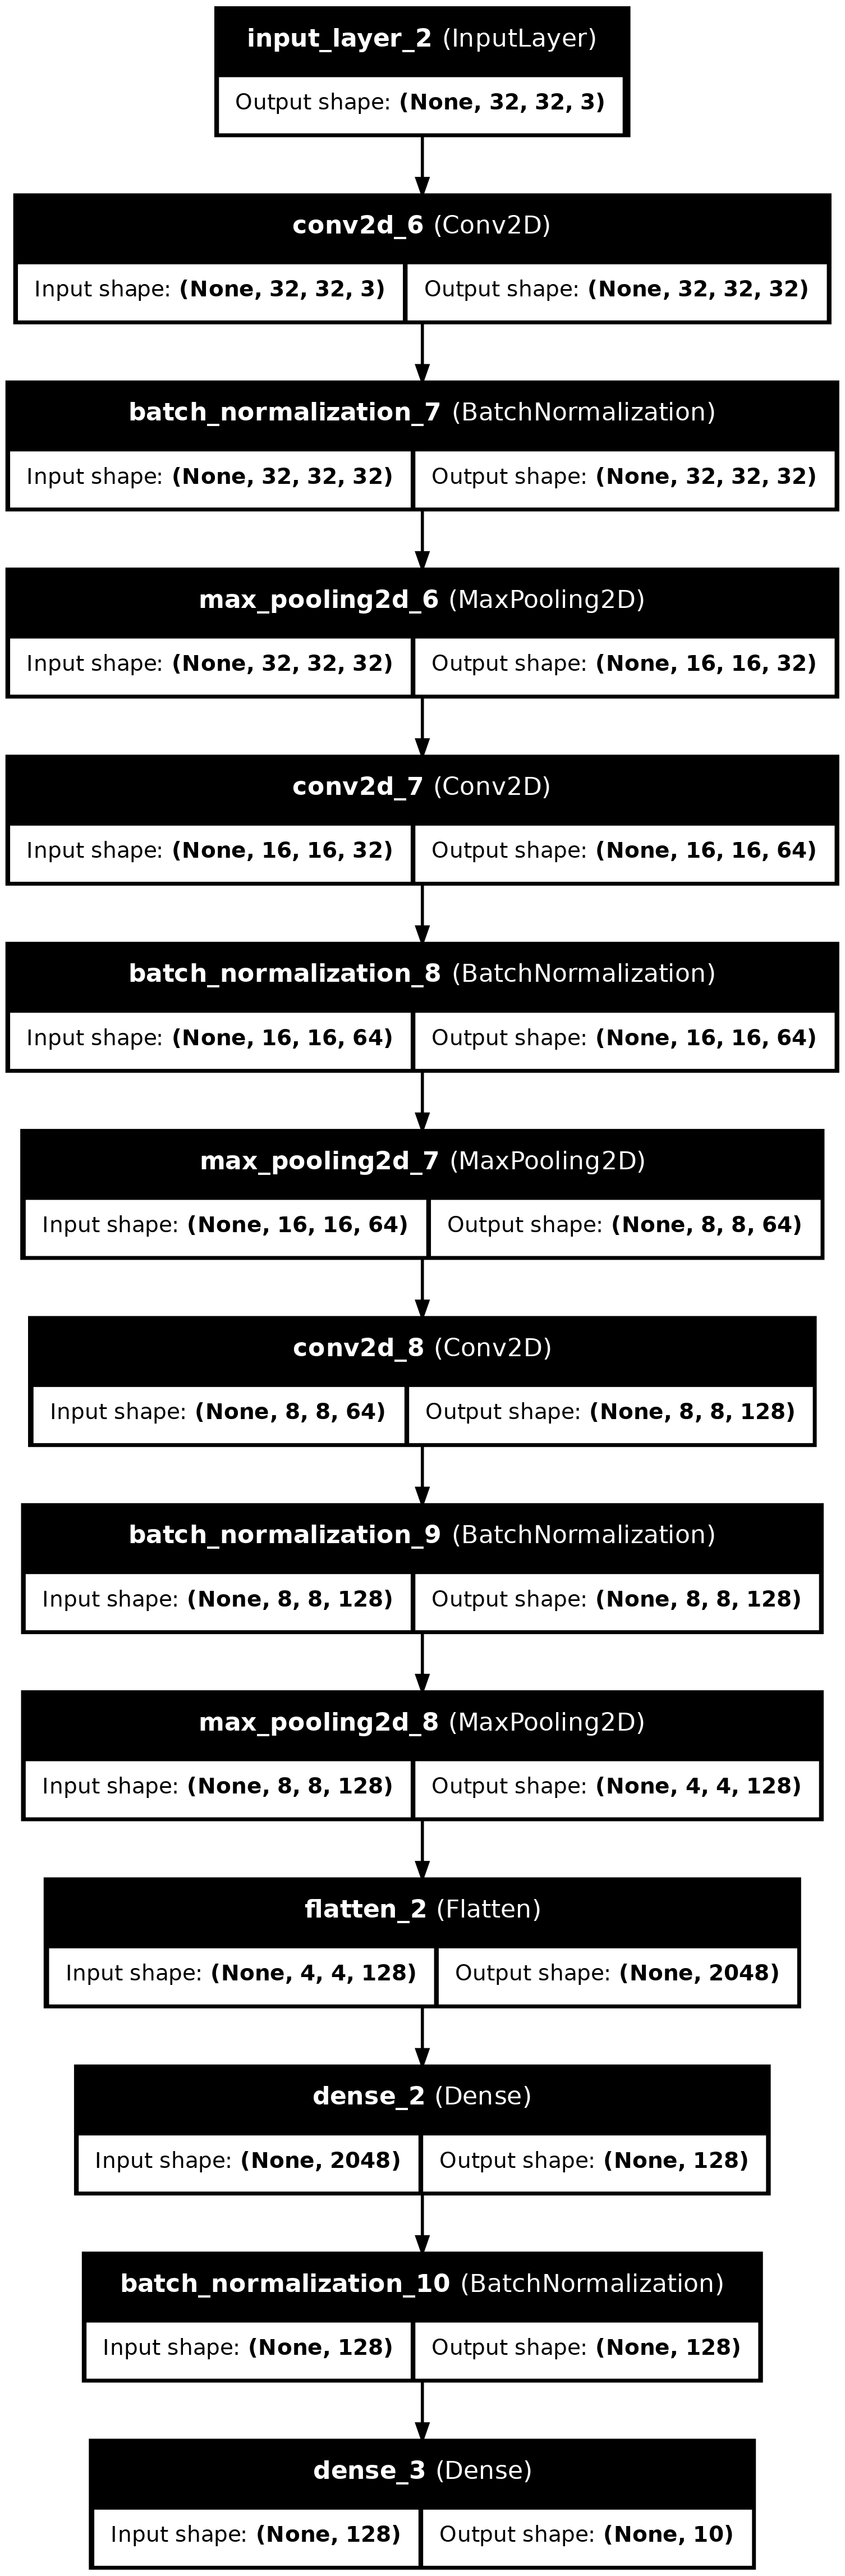

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

# Model Training

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10, 
                    steps_per_epoch=10, # To be disabled
                    validation_data=test_ds)

Epoch 1/10


2025-05-25 15:38:17.458837: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 153600000 exceeds 10% of free system memory.


 2/10 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.1211 - loss: 2.8843

2025-05-25 15:38:21.178288: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 559ms/step - accuracy: 0.2042 - loss: 2.5808 - val_accuracy: 0.1818 - val_loss: 2.2708
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 566ms/step - accuracy: 0.3236 - loss: 1.8956 - val_accuracy: 0.1640 - val_loss: 2.3281
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 907ms/step - accuracy: 0.3695 - loss: 1.7543 - val_accuracy: 0.1683 - val_loss: 2.4062
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 567ms/step - accuracy: 0.3980 - loss: 1.6711 - val_accuracy: 0.1211 - val_loss: 2.5774
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 545ms/step - accuracy: 0.4737 - loss: 1.4896 - val_accuracy: 0.1406 - val_loss: 2.7571
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 629ms/step - accuracy: 0.4426 - loss: 1.5365 - val_accuracy: 0.1035 - val_loss: 2.9782
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 611ms/step - accuracy: 0.4300 - loss: 1.5690 - val_accuracy: 0.1013 - val_loss: 3.0813
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 619ms/step - accuracy: 0.4729 - loss: 1.4576 - val_accuracy: 0.1008 - val_

# Plot Training Curve

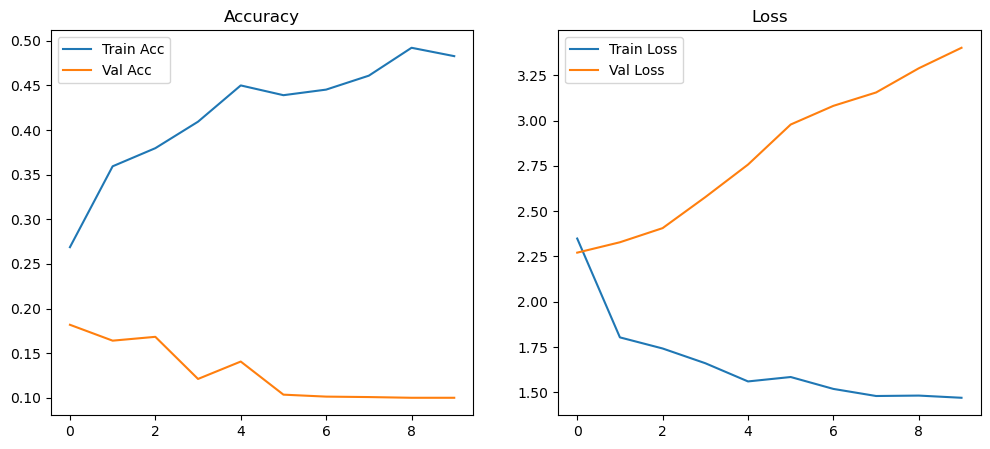

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()